# **Product Purchase Prediction - Facebook Ads**



> Nama: Berryl Bagas Wirawan


> Bahasa Pemrograman: Python





# Data Understanding

## Introduction to Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("/content/Dataset_10 - Advertising.csv")
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


**Data:**

1.) ad_id: angka unik untuk setiap ad yang diluncurkan.

2.) xyzcampaignid: ID yang terkait pada setiap campaign dari tiga perusahaan XYZ.

3.) fbcampaignid: ID yang menunjukkan bagaimana Facebook melacak setiap campaign. ID ini digunakan oleh sistem di Facebook untuk mengelompokkan setiap konten yang diunggah.

4.) age: umur seseorang yang menerima iklan tersebut.

5.) gender: jenis kelamin seseorang yang menerima iklan tersebut

6.) interest: jumlah akun FB yang profilenya sesuai dengan campaign iklan tersebut.

7.) Impressions: : berapa kali iklan ditampilkan.

8.) Clicks: jumlah klik terhadap iklan tersebut.

9.) Spent:  jumlah yang dibayarkan perusahaan kepada fb ad.

10.) Total conversion:  jumlah total orang yang bertanya tentang produk setelah melihat iklan.

11.) Approved conversion: jumlah total orang yang membeli produk setelah melihat iklan.

## Business Problem



1.  Bagaimana agar perusahaan bisa memanfaatkan FB Ads dengan maksimal?
2.  Bagaimana cara untuk memprediksi jumlah penjualan dan menentukan peubah yang paling berpengaruh terhadap penjualan?



# Data Preparation

## Check Missing Value

In [4]:
df.isnull().sum(axis=0)

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

Tidak ada missing value pada dataset ini.

## Check Datatype

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


Masih ada beberapa peubah yang memiliki type data object, maka harus diubah ke tipe data numerik atau kategori

In [6]:
def data_types(data):
  nominal = ['ad_id','xyz_campaign_id','fb_campaign_id','gender']
  ordinal = ['age']
  numeric =  ['interest','Impressions','Clicks','Spent' ,'Total_Conversion','Approved_Conversion']

  #convert
  data[nominal] = data[nominal].astype( 'category')
  data[ordinal] = data[ordinal].astype(  'category')


  return data

df = data_types(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ad_id                1143 non-null   category
 1   xyz_campaign_id      1143 non-null   category
 2   fb_campaign_id       1143 non-null   category
 3   age                  1143 non-null   category
 4   gender               1143 non-null   category
 5   interest             1143 non-null   int64   
 6   Impressions          1143 non-null   int64   
 7   Clicks               1143 non-null   int64   
 8   Spent                1143 non-null   float64 
 9   Total_Conversion     1143 non-null   int64   
 10  Approved_Conversion  1143 non-null   int64   
dtypes: category(5), float64(1), int64(5)
memory usage: 136.2 KB


Data siap digunakan untuk EDA

# Exploratory Data Analysis

## Data Describe

In [ ]:
df.describe()

,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


## Approved Conversion

Text(0.5, 1.0, 'Boxplot of APPROVED CONVERSION')

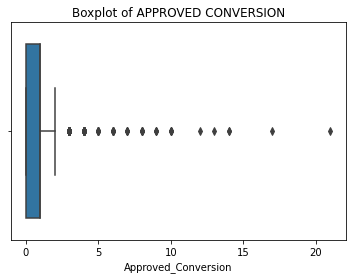

In [ ]:
box = sns.boxplot(data=df, x='Approved_Conversion')
box.set_title('Boxplot of APPROVED CONVERSION')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


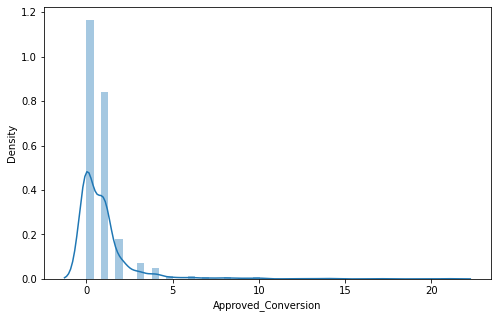

In [ ]:
plt.figure(figsize=(8,5))
sns.distplot(df['Approved_Conversion'])
plt.show()

Dari kedua grafik di atas, dapat kita lihat bahwa approved conversion merupakan data diskrit dan sebarannya mirip dengan poisson distribution.

## FB Ads Condition

### Age

In [ ]:
df.groupby(['age']).agg({'Approved_Conversion':'sum'}).reset_index()

,age,Approved_Conversion
0,30-34,494
1,35-39,207
2,40-44,170
3,45-49,208


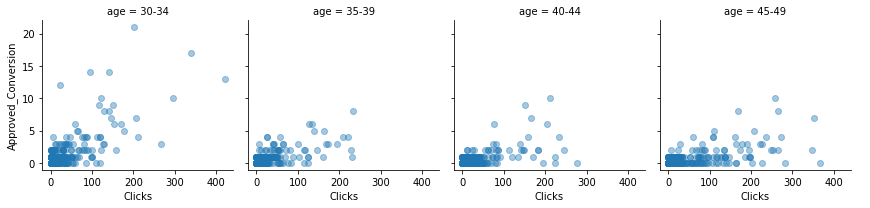

In [ ]:
ax = sns.FacetGrid(df, col="age")
ax.map(plt.scatter, "Clicks", "Approved_Conversion", alpha=.4)
ax.add_legend();

Customer yang berumur 30-34 tahun memiliki kecendrungan lebih untuk membeli produk setelah menonton campaign. Total pembelian produk oleh customer yang berumur 30-34 yaitu 494 buah.

### Gender

In [ ]:
df.groupby(['gender']).agg({'Approved_Conversion':'sum'}).reset_index()

,gender,Approved_Conversion
0,F,495
1,M,584


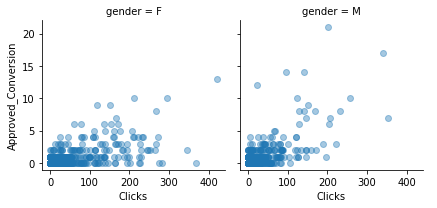

In [ ]:
ax = sns.FacetGrid(df, col="gender")
ax.map(plt.scatter, "Clicks", "Approved_Conversion", alpha=.4)
ax.add_legend();

Tidak ada perbedaan jauh jumlah pembelian antara pria dan wanita, namun wanita cendrung lebih banyak melakukan clicks dibandingkan pria.

## Correlations

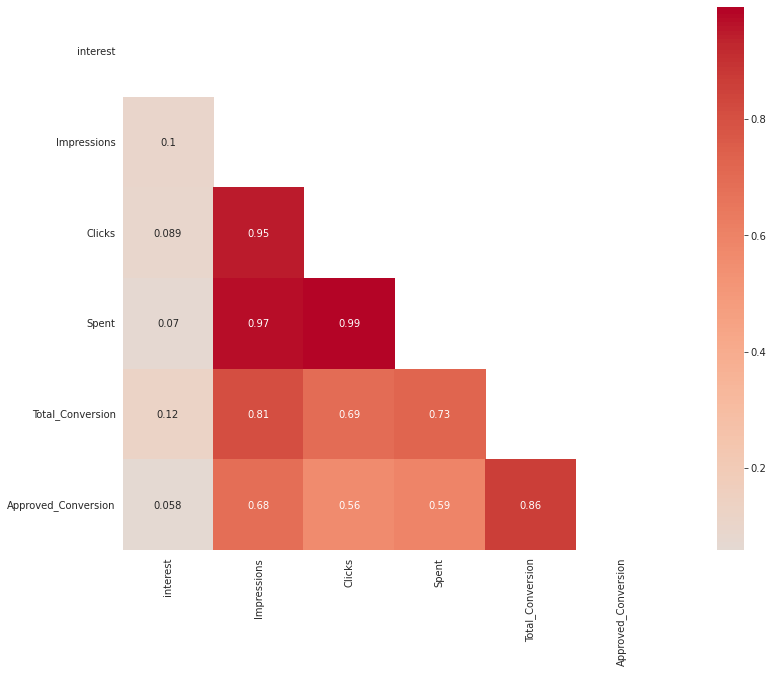

In [ ]:
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=True, cmap='coolwarm', center=0, square=True)

Dapat kita lihat ada beberapa peubah yang memiliki korelasi kuat, salah satunya spent dengan click memberikan nilai korelasi 0.99 yang artinya kedua peubah tersebut memiliki hubungan kausalitas dan harus dikeluarkan dari model nantinya.

Text(0.5, 0.95, 'Relationship between numerical features')

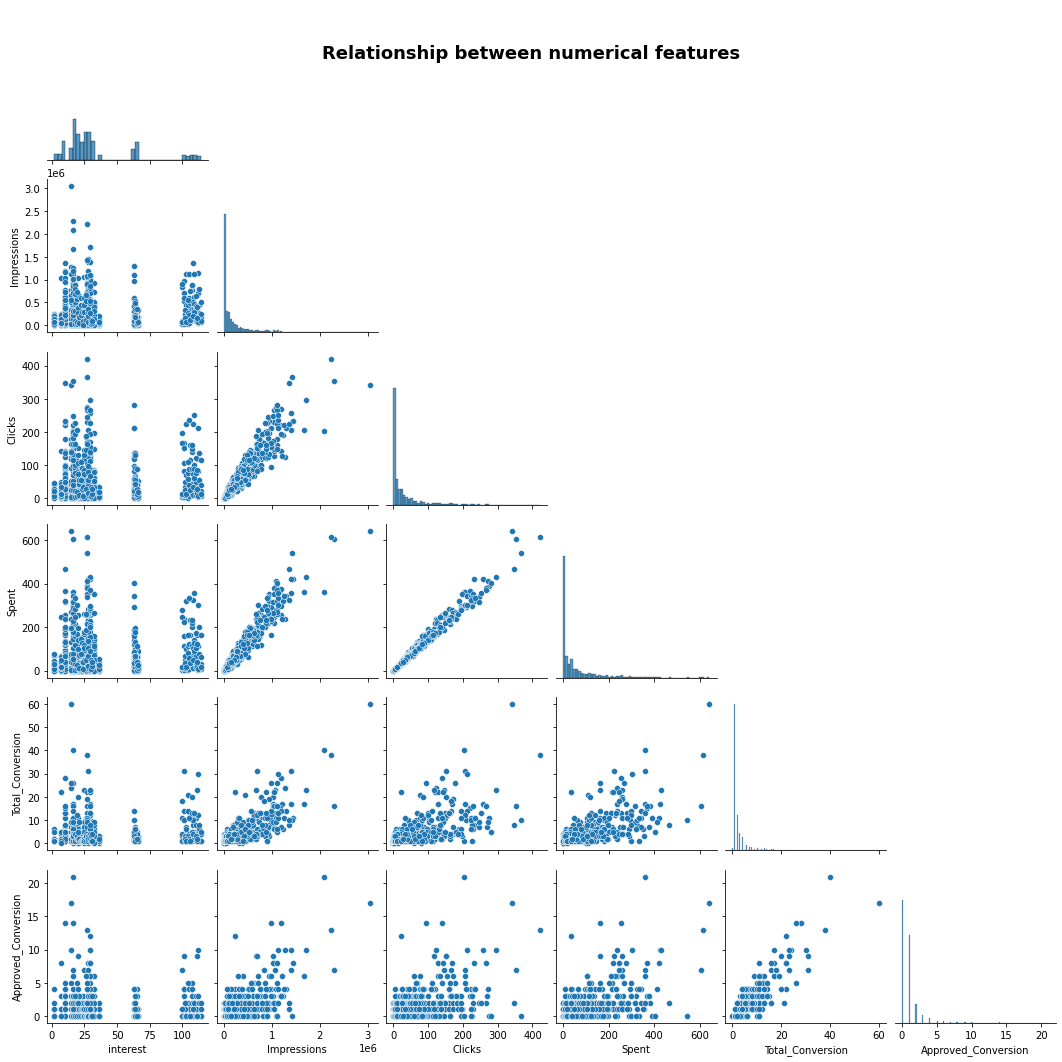

In [ ]:
sns.pairplot(df, corner=True)
plt.suptitle("Relationship between numerical features", x=0.5 ,y=0.95, size=18, weight='bold')

Dapat kita lihat dari scatterplot di atas, peubah Approved_Conversion ternyata memiliki hubungan linear yang kuat dengan Total_Conversion.

# Data Preprocessing

## Encoder

In [7]:
def handling_preprocessing(data):
  # age (ordinal)
  labelAge = {'30-34':1, '35-39':2, '40-44':3, '45-49':4}
  data['age'] = data['age'].map(labelAge)

  # gender (nominal)
  data = pd.get_dummies(data, columns=['gender'], prefix='', prefix_sep='')

  return data
df = handling_preprocessing(df)
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,F,M
0,708746,916,103916,1,15,7350,1,1.43,2,1,0,1
1,708749,916,103917,1,16,17861,2,1.82,2,0,0,1
2,708771,916,103920,1,20,693,0,0.00,1,0,0,1
3,708815,916,103928,1,28,4259,1,1.25,1,0,0,1
4,708818,916,103928,1,28,4133,1,1.29,1,1,0,1


## Rename Column

In [8]:
df = df.rename(columns={'F':'Female','M':'Male'})
df.head(1)

,ad_id,xyz_campaign_id,fb_campaign_id,age,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Female,Male
0,708746,916,103916,1,15,7350,1,1.43,2,1,0,1


## Feature Scalling

In [9]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df[['interest', 'Impressions','Clicks','Spent','Total_Conversion']] = scaler.fit_transform(df[['interest', 'Impressions','Clicks','Spent','Total_Conversion']])
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Female,Male
0,708746,916,103916,1,-0.666667,-0.205137,-0.191781,-0.186865,0.5,1,0,1
1,708749,916,103917,1,-0.600000,-0.156309,-0.164384,-0.180203,0.5,0,0,1
2,708771,916,103920,1,-0.333333,-0.236062,-0.219178,-0.211290,0.0,0,0,1
3,708815,916,103928,1,0.200000,-0.219496,-0.191781,-0.189939,0.0,0,0,1
4,708818,916,103928,1,0.200000,-0.220082,-0.191781,-0.189256,0.0,1,0,1


# Train Test Split Data

In [10]:
from sklearn.model_selection import train_test_split

cols_X = ['age','Female','Male','interest','Impressions','Clicks','Total_Conversion'] 
cols_Y = ['Approved_Conversion']

X = df[cols_X]
y = df[cols_Y]

x_train, x_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2, random_state = 123)

# Data Modeling

## Modeling Process

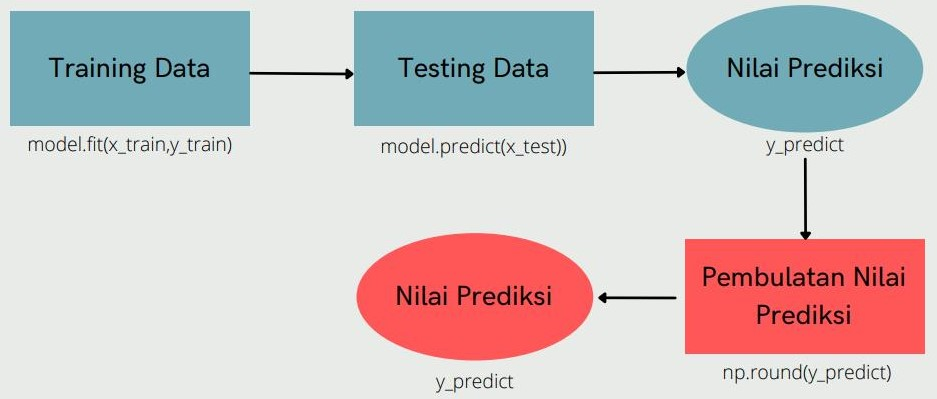

Data penjualan berupa data diskrit sedangkan ouput model regresi biasanya berupa data kontinu. Oleh karena itu, akan dilakukannya pembulatan pada hasil prediksi menggunakan library numpy.round


## Model Train-Testing

In [11]:
from sklearn.linear_model import ElasticNet, LinearRegression, Lasso, Ridge, HuberRegressor, PoissonRegressor, ElasticNet
from sklearn.svm import LinearSVR, SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score,mean_absolute_percentage_error

In [14]:
ad =  AdaBoostRegressor()
ad.fit(x_train,y_train) 
y_jawaban = ad.predict(x_test)
ad.mse = mean_squared_error(y_test,y_jawaban)
ad.rmse = np.sqrt(mean_squared_error(y_test,y_jawaban))
ad.r2 = r2_score(y_test,y_jawaban)
ad.mae = mean_absolute_error(y_test,y_jawaban)
ad.mape = mean_absolute_percentage_error(y_test,y_jawaban)

h =  GradientBoostingRegressor()
h.fit(x_train,y_train) 
y_jawaban = h.predict(x_test)
h.mse = mean_squared_error(y_test,y_jawaban)
h.rmse = np.sqrt(mean_squared_error(y_test,y_jawaban))
h.r2 = r2_score(y_test,y_jawaban)
h.mae = mean_absolute_error(y_test,y_jawaban)
h.mape = mean_absolute_percentage_error(y_test,y_jawaban)

en =  ElasticNet()
en.fit(x_train,y_train) 
y_jawaban = en.predict(x_test)
en.mse = mean_squared_error(y_test,y_jawaban)
en.rmse = np.sqrt(mean_squared_error(y_test,y_jawaban))
en.r2 = r2_score(y_test,y_jawaban)
en.mae = mean_absolute_error(y_test,y_jawaban)
en.mape = mean_absolute_percentage_error(y_test,y_jawaban)

ls = Lasso()
ls.fit(x_train,y_train) 
y_jawaban = ls.predict(x_test)
ls.mse = mean_squared_error(y_test,y_jawaban)
ls.rmse = np.sqrt(mean_squared_error(y_test,y_jawaban))
ls.r2 = r2_score(y_test,y_jawaban)
ls.mae = mean_absolute_error(y_test,y_jawaban)
ls.mape = mean_absolute_percentage_error(y_test,y_jawaban)

lr = LinearRegression()
lr.fit(x_train,y_train) 
y_jawaban = lr.predict(x_test)
lr.mse = mean_squared_error(y_test,y_jawaban)
lr.rmse = np.sqrt(mean_squared_error(y_test,y_jawaban))
lr.r2 = r2_score(y_test,y_jawaban)
lr.mae = mean_absolute_error(y_test,y_jawaban)
lr.mape = mean_absolute_percentage_error(y_test,y_jawaban)

mlp = MLPRegressor()
mlp.fit(x_train,y_train)
y_jawaban = mlp.predict(x_test)
mlp.mse = mean_squared_error(y_test,y_jawaban)
mlp.rmse = np.sqrt(mean_squared_error(y_test,y_jawaban))
mlp.r2 = r2_score(y_test,y_jawaban)
mlp.mae = mean_absolute_error(y_test,y_jawaban)
mlp.mape = mean_absolute_percentage_error(y_test,y_jawaban)

r =  Ridge()
r.fit(x_train,y_train)
y_jawaban = r.predict(x_test)
r.mse = mean_squared_error(y_test,y_jawaban)
r.rmse = np.sqrt(mean_squared_error(y_test,y_jawaban))
r.r2 = r2_score(y_test,y_jawaban)
r.mae = mean_absolute_error(y_test,y_jawaban)
r.mape = mean_absolute_percentage_error(y_test,y_jawaban)

lsvr = LinearSVR()
lsvr.fit(x_train,y_train) 
y_jawaban = lsvr.predict(x_test)
lsvr.mse = mean_squared_error(y_test,y_jawaban)
lsvr.rmse = np.sqrt(mean_squared_error(y_test,y_jawaban))
lsvr.r2 = r2_score(y_test,y_jawaban)
lsvr.mae = mean_absolute_error(y_test,y_jawaban)
lsvr.mape = mean_absolute_percentage_error(y_test,y_jawaban)

rf = RandomForestRegressor()
rf.fit(x_train,y_train) 
y_jawaban = rf.predict(x_test)
rf.mse = mean_squared_error(y_test,y_jawaban)
rf.rmse = np.sqrt(mean_squared_error(y_test,y_jawaban))
rf.r2 = r2_score(y_test,y_jawaban)
rf.mae = mean_absolute_error(y_test,y_jawaban)
rf.mape = mean_absolute_percentage_error(y_test,y_jawaban)

d = DecisionTreeRegressor()
d.fit(x_train,y_train) 
y_jawaban = d.predict(x_test)
d.mse = mean_squared_error(y_test,y_jawaban)
d.rmse = np.sqrt(mean_squared_error(y_test,y_jawaban))
d.r2 = r2_score(y_test,y_jawaban)
d.mae = mean_absolute_error(y_test,y_jawaban)
d.mape = mean_absolute_percentage_error(y_test,y_jawaban)

hb =  HuberRegressor()
hb.fit(x_train,y_train) 
y_jawaban = hb.predict(x_test)
hb.mse = mean_squared_error(y_test,y_jawaban)
hb.rmse = np.sqrt(mean_squared_error(y_test,y_jawaban))
hb.r2 = r2_score(y_test,y_jawaban)
hb.mae = mean_absolute_error(y_test,y_jawaban)
hb.mape = mean_absolute_percentage_error(y_test,y_jawaban)

p =  PoissonRegressor()
p.fit(x_train,y_train) 
y_jawaban = p.predict(x_test)
p.mse = mean_squared_error(y_test,y_jawaban)
p.rmse = np.sqrt(mean_squared_error(y_test,y_jawaban))
p.r2 = r2_score(y_test,y_jawaban)
p.mae = mean_absolute_error(y_test,y_jawaban)
p.mape = mean_absolute_percentage_error(y_test,y_jawaban)

nb = LinearRegression(positive=True)
nb.fit(x_train,y_train) 
y_jawaban = nb.predict(x_test)
nb.mse = mean_squared_error(y_test,y_jawaban)
nb.rmse = np.sqrt(mean_squared_error(y_test,y_jawaban))
nb.r2 = r2_score(y_test,y_jawaban)
nb.mae = mean_absolute_error(y_test,y_jawaban)
nb.mape = mean_absolute_percentage_error(y_test,y_jawaban)

In [13]:
dic = {'Model':['ElasticNetRegression','LassoRegression','LinearRegression','RidgeRegression','DecisionTreeRegressor','RandomForestRegressor','HuberRegressor', 'PoissonRegressor','GradientBoostingRegressor','AdaBoostRegressor'],
       'MAE':[ en.mae , ls.mae,lr.mae,r.mae,d.mae,rf.mae,hb.mae,p.mae,h.mae,ad.mae],
       'MSE':[ en.mse , ls.mse,lr.mse,r.mse,d.mse,rf.mse,hb.mse,p.mse,h.mse,ad.mse],
       'RMSE':[ en.rmse , ls.rmse,lr.rmse,r.rmse,d.rmse,rf.rmse,hb.rmse,p.rmse,h.rmse,ad.rmse],
       'R2':[ en.r2 , ls.r2,lr.r2,r.r2,d.r2,rf.r2,hb.r2,p.r2,h.r2,ad.r2],
       'MAPE':[ en.mape , ls.mape,lr.mape,r.mape,d.mape,rf.mape,hb.mape,p.mape,h.mape,ad.mape]}
compare = pd.DataFrame(dic)
compare.sort_values(by='R2',ascending=False)

,Model,MAE,MSE,RMSE,R2,MAPE
6,HuberRegressor,0.622570,0.941489,0.970304,0.777791,9.385760e+14
3,RidgeRegression,0.631801,0.968902,0.984328,0.771321,9.774772e+14
2,LinearRegression,0.631862,0.969251,0.984506,0.771239,9.774455e+14
0,ElasticNetRegression,0.660180,1.076061,1.037333,0.746030,1.284684e+15
1,LassoRegression,0.682898,1.222001,1.105442,0.711585,1.390312e+15
9,AdaBoostRegressor,0.702077,1.256984,1.121153,0.703328,1.228754e+15
8,GradientBoostingRegressor,0.671627,1.345160,1.159810,0.682517,1.004038e+15
5,RandomForestRegressor,0.691004,1.463477,1.209742,0.654592,1.039565e+15
4,DecisionTreeRegressor,0.737991,1.567686,1.252073,0.629997,1.061984e+15
7,PoissonRegressor,2.461530,635.762721,25.214336,-149.051905,1.471061e+15


Model linear cendrung memiliki nilai R-squared yang lebih besar dibandingkan
dengan metode model lainnya (TreeBased, Ensemble)
 

*   Huber merupakan model yang robust terhadap outlier
*   Ridge cocok untuk data yang memiliki multikolinearitas

**Persamaan garis regresi model awal HuberRegressor**


> ypred = 0.236-0.010(Age)-0.078(Female)+0.158(Male)-0.022(Interest)+0.107(Impression)-0.137(Clicks)+0.691(Total_Conversion)


**Persamaan garis regresi model awal RidgeRegression**


> ypred = 0.331+0.011(Age)-0.042(Female)+0.042(Male)-0.044(Interest)+0.129(Impression)-0.196(Clicks)+0.728 (Total_Conversion)

# Tuning Hyperparameter

Selajutnya saya akan memilih 2 model awal dengan nilai MAE terendah (Huber dan Ridge) untuk dilakukannya Tuning Hyperparameter 

## Tuning Huber Regressor

In [15]:
from sklearn.model_selection import GridSearchCV

huber = HuberRegressor( )
alpha = [0.1,0.2,0.5,1,10]
epsilon =[0.5,1,1.35,4,1.5]
iter = [100,300,500]
fit = ['True','False']

param_grid = dict(alpha=alpha,epsilon=epsilon,max_iter=iter,fit_intercept=fit)
gridhub = GridSearchCV(huber, param_grid, cv=10, scoring='r2', return_train_score=False)
gridhub.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=HuberRegressor(),
             param_grid={'alpha': [0.1, 0.2, 0.5, 1, 10],
                         'epsilon': [0.5, 1, 1.35, 4, 1.5],
                         'fit_intercept': ['True', 'False'],
                         'max_iter': [100, 300, 500]},
             scoring='r2')

In [16]:
print('parameter ',gridhub.best_params_)

parameter  {'alpha': 10, 'epsilon': 1.35, 'fit_intercept': 'True', 'max_iter': 100}


Didapatkan parameter terbaik untuk HuberRegressor dengan:


*   alpha = 10
*   epsilon = 1.35
*   fit_intercept = True
*   max_iter = 100


Semakin besar nilai epsilon maka garis model HuberRegressor akan mendekati RidgeRegression


## Tuning Ridge Regression

In [17]:
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
alpha = [0.1,0.2,0.5,1,10]

param_grid = dict(alpha=alpha)
gridr = GridSearchCV(ridge, param_grid, cv=10, scoring='r2', return_train_score=False)
gridr.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.2, 0.5, 1, 10]}, scoring='r2')

In [18]:
print('parameter ',gridr.best_params_)

parameter  {'alpha': 10}


Didapatkan parameter terbaik untuk RidgeRegression dengan:


*   alpha = 10

## Model Tuning Train-Test

In [19]:
r =  Ridge()
r.fit(x_train,y_train)
y_jawaban = r.predict(x_test)
r.mse = mean_squared_error(y_test,y_jawaban)
r.rmse = np.sqrt(mean_squared_error(y_test,y_jawaban))
r.r2 = r2_score(y_test,y_jawaban)
r.mae = mean_absolute_error(y_test,y_jawaban)
r.mape = mean_absolute_percentage_error(y_test,y_jawaban)

gridr =  Ridge(alpha=10)
gridr.fit(x_train,y_train)
y_jawaban = gridr.predict(x_test)
gridr.mse = mean_squared_error(y_test,y_jawaban)
gridr.rmse = np.sqrt(mean_squared_error(y_test,y_jawaban))
gridr.r2 = r2_score(y_test,y_jawaban)
gridr.mae = mean_absolute_error(y_test,y_jawaban)
gridr.mape = mean_absolute_percentage_error(y_test,y_jawaban)

hb =  HuberRegressor()
hb.fit(x_train,y_train) 
y_jawaban = hb.predict(x_test)
hb.mse = mean_squared_error(y_test,y_jawaban)
hb.rmse = np.sqrt(mean_squared_error(y_test,y_jawaban))
hb.r2 = r2_score(y_test,y_jawaban)
hb.mae = mean_absolute_error(y_test,y_jawaban)
hb.mape = mean_absolute_percentage_error(y_test,y_jawaban)

gridhub =  HuberRegressor(alpha= 10, epsilon= 1.35, fit_intercept='True', max_iter= 100)
gridhub.fit(x_train,y_train) 
y_jawaban = gridhub.predict(x_test)
gridhub.mse = mean_squared_error(y_test,y_jawaban)
gridhub.rmse = np.sqrt(mean_squared_error(y_test,y_jawaban))
gridhub.r2 = r2_score(y_test,y_jawaban)
gridhub.mae = mean_absolute_error(y_test,y_jawaban)
gridhub.mape = mean_absolute_percentage_error(y_test,y_jawaban)


dic = {'Model':['RidgeRegression','Tuning RidgeRegression','HubberRegressor','Tuning HuberRegressor'],
       'MAE':[r.mae,gridr.mae,hb.mae,gridhub.mae],
       'MSE':[ r.mse,gridr.mse,hb.mse,gridhub.mse],
       'RMSE':[r.rmse,gridr.rmse,hb.rmse,gridhub.rmse],
       'R2':[ r.r2,gridr.r2,hb.r2,gridhub.r2],
       'MAPE':[ r.mape,gridr.mape,hb.mape,gridhub.mape]}
compare = pd.DataFrame(dic)
compare.sort_values(by='R2',ascending=False)

,Model,MAE,MSE,RMSE,R2,MAPE
3,Tuning HuberRegressor,0.622010,0.938860,0.968948,0.778411,9.395662e+14
2,HubberRegressor,0.622570,0.941489,0.970304,0.777791,9.385760e+14
1,Tuning RidgeRegression,0.631285,0.965790,0.982746,0.772055,9.777415e+14
0,RidgeRegression,0.631801,0.968902,0.984328,0.771321,9.774772e+14


Model Tuning mampu menaikan R-squared kedua model awal. Tuning HuberRegressor memberikan R-squared paling besar yaitu 77,84%

**Persamaan garis regresi model tuning HuberRegressor**


> ypred = 0.358-0.012(Age)-0.040(Female)+0.040(Male)-0.022(Interest)+0.097(Impression)-0.124(Clicks)+0.686(Total_Conversion)

# Model Evaluation

In [20]:
r =  Ridge(alpha=10)
r.fit(x_train,y_train)
y_jawaban = r.predict(x_test)
r.mse = mean_squared_error(y_test,y_jawaban)
r.rmse = np.sqrt(mean_squared_error(y_test,y_jawaban))
r.r2 = r2_score(y_test,y_jawaban)
r.mae = mean_absolute_error(y_test,y_jawaban)
r.mape = mean_absolute_percentage_error(y_test,y_jawaban)

gridr =  Ridge(alpha=10)
gridr.fit(x_train,y_train)
y_jawaban = gridr.predict(x_train)
gridr.mse = mean_squared_error(y_train,y_jawaban)
gridr.rmse = np.sqrt(mean_squared_error(y_train,y_jawaban))
gridr.r2 = r2_score(y_train,y_jawaban)
gridr.mae = mean_absolute_error(y_train,y_jawaban)
gridr.mape = mean_absolute_percentage_error(y_train,y_jawaban)

hb =  HuberRegressor(alpha= 10, epsilon= 1.35, fit_intercept='True', max_iter= 100)
hb.fit(x_train,y_train) 
y_jawaban = hb.predict(x_test)
hb.mse = mean_squared_error(y_test,y_jawaban)
hb.rmse = np.sqrt(mean_squared_error(y_test,y_jawaban))
hb.r2 = r2_score(y_test,y_jawaban)
hb.mae = mean_absolute_error(y_test,y_jawaban)
hb.mape = mean_absolute_percentage_error(y_test,y_jawaban)

gridhub =  HuberRegressor(alpha= 10, epsilon= 1.35, fit_intercept='True', max_iter= 100)
gridhub.fit(x_train,y_train) 
y_jawaban = gridhub.predict(x_train)
gridhub.mse = mean_squared_error(y_train,y_jawaban)
gridhub.rmse = np.sqrt(mean_squared_error(y_train,y_jawaban))
gridhub.r2 = r2_score(y_train,y_jawaban)
gridhub.mae = mean_absolute_error(y_train,y_jawaban)
gridhub.mape = mean_absolute_percentage_error(y_train,y_jawaban)

dic = {'Model':['Tuning RidgeRegression','Tuning RidgeRegression','Tuning HubberRegressor','Tuning HuberRegressor'],
       'Data':['Testing','Training','Testing','Training'],
       'MSE':[r.mse,gridr.mse,hb.mse,gridhub.mse],
       'MAE':[r.mae,gridr.mae,hb.mae,gridhub.mae],
       'RMSE':[r.rmse,gridr.rmse,hb.rmse,gridhub.rmse],
       'R2':[ r.r2,gridr.r2,hb.r2,gridhub.r2],
       'MAPE':[ r.mape,gridr.mape,hb.mape,gridhub.mape]}
compare = pd.DataFrame(dic)
compare.to_csv('test train.csv', index=False)
compare

,Model,Data,MSE,MAE,RMSE,R2,MAPE
0,Tuning RidgeRegression,Testing,0.965790,0.631285,0.982746,0.772055,9.777415e+14
1,Tuning RidgeRegression,Training,0.688778,0.615401,0.829927,0.745963,9.974336e+14
2,Tuning HubberRegressor,Testing,0.938860,0.622010,0.968948,0.778411,9.395662e+14
3,Tuning HuberRegressor,Training,0.694537,0.612884,0.833389,0.743839,9.672641e+14


Penurunan Rsquared pada data testing dan training tidak terlalu jauh, maka bisa dikatakan model tersebut Good-fit

# Predict Example (Huber Regressor)

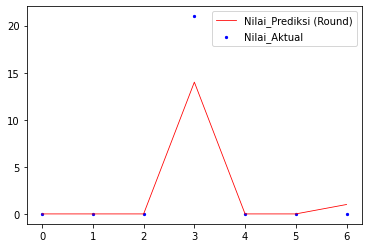

In [21]:
hb =  HuberRegressor(alpha= 10, epsilon= 1.35, fit_intercept='True', max_iter= 100)
hb.fit(x_train,y_train) 
y_pred = hb.predict(x_test.head(7))
y_jawaban = [np.round(item) for item in y_pred]
x_ax = range(len(x_test.head(7)))
plt.scatter(x_ax, y_test.head(7), s=5, color="blue", label="Nilai_Aktual")
plt.plot(x_ax, y_jawaban, lw=0.8, color="red", label="Nilai_Prediksi (Round)")
plt.legend()
plt.show()

In [22]:
b = y_test.head(7).reset_index()
b.drop('index',axis=1,inplace=True)
b= b.rename(columns={'Approved_Conversion':'Nilai_Aktual'})
a = pd.DataFrame(y_pred)
a= a.rename(columns={0:'Nilai_Prediksi'})
c = pd.DataFrame(y_jawaban)
c= c.rename(columns={0:'Nilai_Prediksi(Round)'})
predict = [b,a,c]
predict = pd.concat(predict,axis=1,join='inner')
predict

,Nilai_Aktual,Nilai_Prediksi,Nilai_Prediksi(Round)
0,0,0.375595,0.0
1,0,0.227703,0.0
2,0,0.288956,0.0
3,21,14.049124,14.0
4,0,0.230973,0.0
5,0,0.402268,0.0
6,0,0.949662,1.0


# Kesimpulan dan Saran

## Kesimpulan

Dari hasil analisis deskriptif didapatkan kelompok gender wanita cendrung lebih banyak melakukan clicks dibandingkan laki-laki, selain itu kelompok umur 30-34 merupakan customer yang paling banyak membeli produk.

Didapatkan model regresi terbaik menggunakan Huber Regressor dengan nilai MAE sebesar 0,66201 dan r-squared 77,84%. Artinya peubah-peubah independen pada model tersebut mampu memprediksi ragam Approved_Conversion sebesar 77,84% dan sisanya dipengaruhi oleh peubah di luar model kami.

**Persamaan garis regresi model tuning HuberRegressor**


> ypred = 0.358-0.012(Age)-0.040(Female)+0.040(Male)-0.022(Interest)+0.097(Impression)-0.124(Clicks)+0.686(Total_Conversion)

Peubah Total_Conversion merupakan peubah yang memiliki koefesien paling besar, dengan customer melakukan 1 kali Total_Conversion makan akan meningkatkan rataan penjualan sebesar 0.686

Model ini masih memiliki kekurangan ketika memprediksi data penjualan yang besar
dikarenakan terbatasnya ketersediaan data. Jika dikembangkan lebih lanjut, model ini dapat digunakan untuk digital marketing dimana perusahaan dapat memonitoring kualitas konten mereka. Jadi ketika konten dalam beberapa prediksi memiliki target pembelian rendah, maka mereka dapat membuat konten baru atau menambahkan inovasi pada konten lama sehinggan dapat tepat sasaran.

## Saran

Untuk kedepannya apabila ingin menggunakan FB Ads dengan optimal bisa melakukan
penyetelan kriteria umur pada selang 30-34.

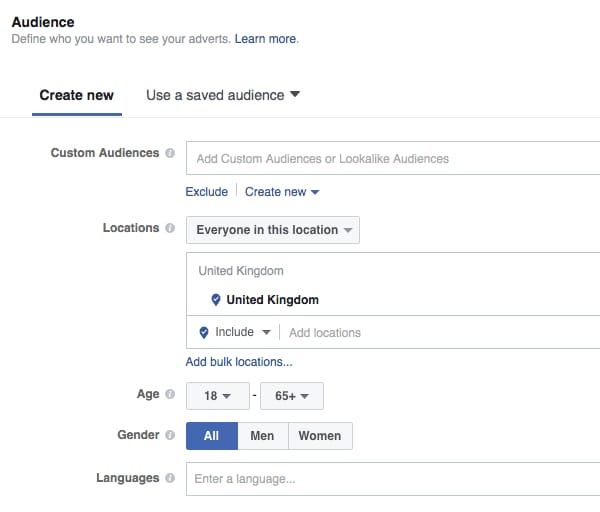